In [6]:
# import all needed libraries
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import warnings
import os

import nltk
from nltk.corpus import words as english_words, stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import seaborn as sns

from wordcloud import WordCloud, STOPWORDS 

from collections import Counter

import torch

import re

warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
# load data
speechs = list()
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)
        text = open(file_path,'r').read()
        speechs.append(text)

print(f"Total Number of Documents : {len(speechs)}")

/kaggle/input/donald-trumps-rallies/NewHampshireAug15_2019.txt
/kaggle/input/donald-trumps-rallies/BattleCreekDec19_2019.txt
/kaggle/input/donald-trumps-rallies/LasVegasFeb21_2020.txt
/kaggle/input/donald-trumps-rallies/MilwaukeeJan14_2020.txt
/kaggle/input/donald-trumps-rallies/FreelandSep10_2020.txt
/kaggle/input/donald-trumps-rallies/LexingtonNov4_2019.txt
/kaggle/input/donald-trumps-rallies/OhioSep21_2020.txt
/kaggle/input/donald-trumps-rallies/FayettevilleSep19_2020.txt
/kaggle/input/donald-trumps-rallies/HendersonSep13_2020.txt
/kaggle/input/donald-trumps-rallies/GreenvilleJul17_2019.txt
/kaggle/input/donald-trumps-rallies/MindenSep12_2020.txt
/kaggle/input/donald-trumps-rallies/FayettevilleSep9_2019.txt
/kaggle/input/donald-trumps-rallies/PittsburghSep22_2020.txt
/kaggle/input/donald-trumps-rallies/DesMoinesJan30_2020.txt
/kaggle/input/donald-trumps-rallies/HersheyDec10_2019.txt
/kaggle/input/donald-trumps-rallies/ToledoJan9_2020.txt
/kaggle/input/donald-trumps-rallies/DallasOct

In [8]:
def cleansing_text(text: str) -> str:
    ## replacing the newlines and extra spaces, and change all character to lower case
    corpus = text.replace('\n', ' ').replace('\r', '').replace('  ',' ').lower()

    ## removing everything except alphabets
    corpus_sans_symbols = re.sub('[^a-zA-Z \n]', '', corpus)

    ## removing stopwords
    stop_words = set(w.lower() for w in stopwords.words())

    corpus_sans_symbols_stopwords = ' '.join(filter(lambda x: x.lower() not in stop_words, corpus_sans_symbols.split()))
    return corpus_sans_symbols_stopwords
    
preprocessed_speechs = list(map(cleansing_text, speechs))

# display an example of Tramp Speech
print(preprocessed_speechs[0][:100] + '...')


thank much everybody thank wow never ever let tell amazing thank manchester new hampshire theyre spe...


In [9]:
stemmer = nltk.PorterStemmer()
def stemmer_str(text: str)-> str:
    corpus_stemmed = ' ' .join (map(lambda str: stemmer.stem(str), text.split()))
    return corpus_stemmed

preprocessed_speechs_stemmer = list(map(stemmer_str, preprocessed_speechs))

print(preprocessed_speechs_stemmer[0][:100] + '...')


thank much everybodi thank wow never ever let tell amaz thank manchest new hampshir theyr special re...


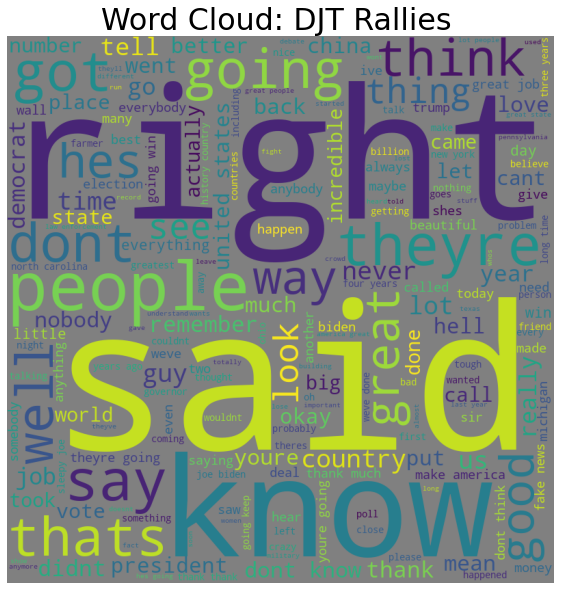

In [10]:
all_speechs_str = ' '.join(preprocessed_speechs)

wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', min_font_size = 10).generate(all_speechs_str)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.rcParams.update({'font.size': 25})
plt.axis("off") 
plt.title('Word Cloud: DJT Rallies ')
plt.tight_layout(pad = 0) 
  
plt.show()

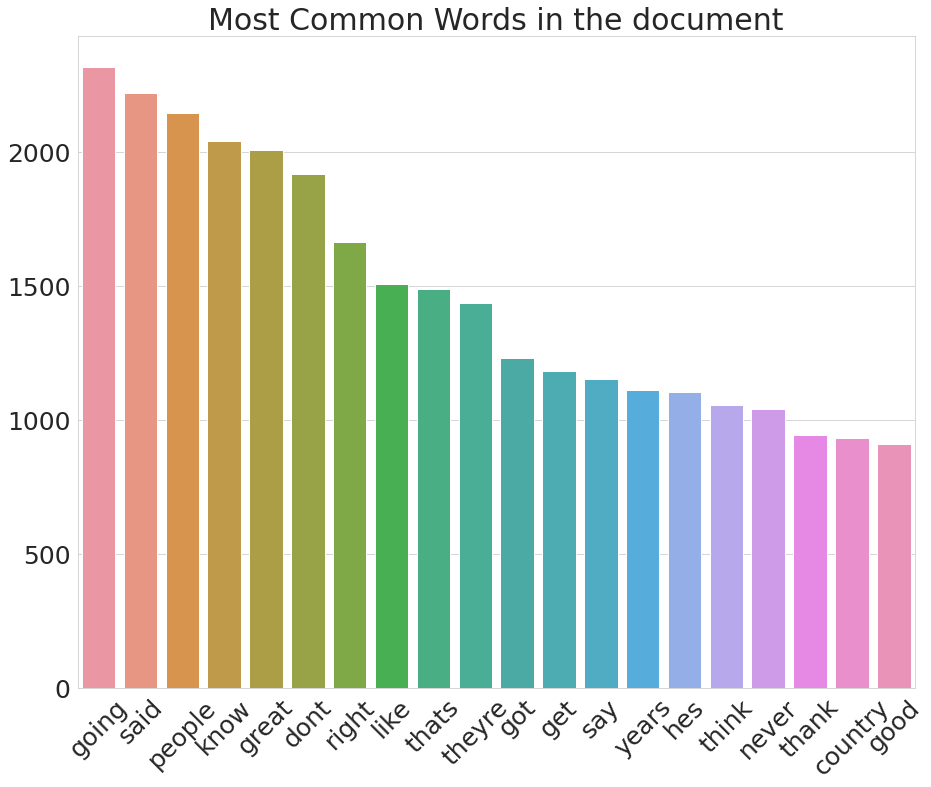

In [11]:
word_freq_count = Counter(' '.join(preprocessed_speechs).split(" "))

common_words = [word[0] for word in word_freq_count.most_common(20)]
common_counts = [word[1] for word in word_freq_count.most_common(20)]

plt.figure(figsize=(15, 12))

sns.set_style("whitegrid")
sns_bar = sns.barplot(x=common_words, y=common_counts)
sns_bar.set_xticklabels(common_words, rotation=45)
plt.title('Most Common Words in the document')
plt.show()

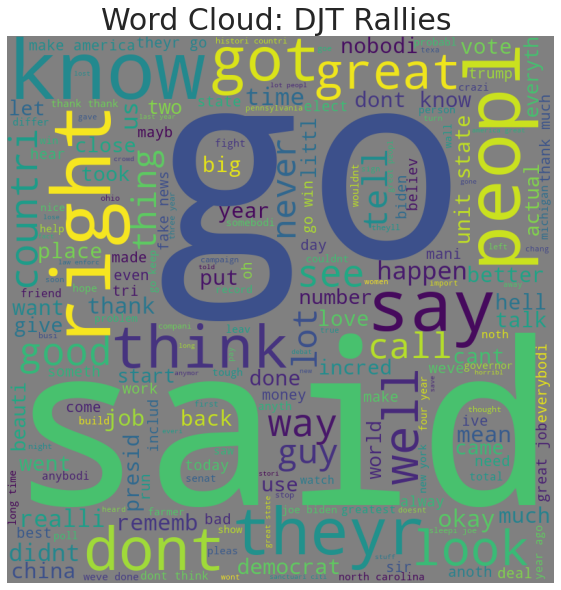

In [12]:
all_speechs_str = ' '.join(preprocessed_speechs_stemmer)

wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', min_font_size = 10).generate(all_speechs_str)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.rcParams.update({'font.size': 25})
plt.axis("off") 
plt.title('Word Cloud: DJT Rallies ')
plt.tight_layout(pad = 0) 
  
plt.show()
 

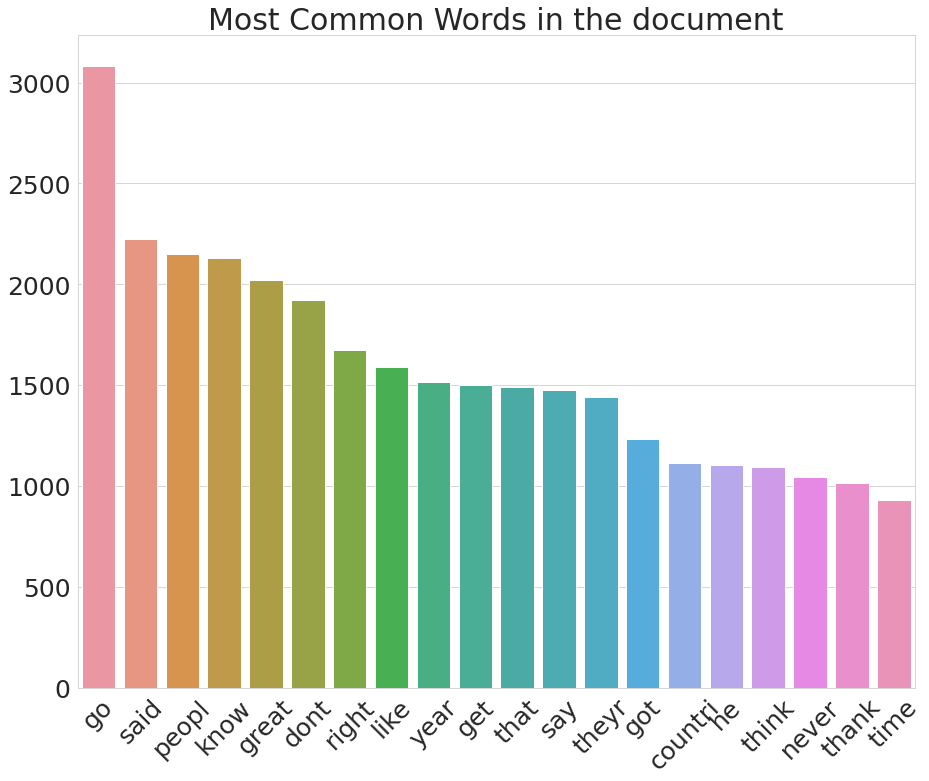

In [13]:
word_freq_count = Counter(' '.join(preprocessed_speechs_stemmer).split(" "))

common_words = [word[0] for word in word_freq_count.most_common(20)]
common_counts = [word[1] for word in word_freq_count.most_common(20)]

plt.figure(figsize=(15, 12))

sns.set_style("whitegrid")
sns_bar = sns.barplot(x=common_words, y=common_counts)
sns_bar.set_xticklabels(common_words, rotation=45)
plt.title('Most Common Words in the document')
plt.show()

In [14]:
from itertools import islice

tfidf_vec = TfidfVectorizer(stop_words="english")
transformed = tfidf_vec.fit_transform(raw_documents=preprocessed_speechs)
index_value={i[1]:i[0] for i in tfidf_vec.vocabulary_.items()}
print( {k: index_value[k] for k in list(index_value)[:50]})

{7441: 'thank', 2514: 'everybody', 8264: 'wow', 4195: 'let', 7391: 'tell', 226: 'amazing', 4438: 'manchester', 4901: 'new', 3264: 'hampshire', 7461: 'theyre', 6935: 'special', 6078: 'remember', 5615: 'primaries', 5616: 'primary', 1024: 'came', 3286: 'happened', 7692: 'trump', 2918: 'fourth', 2300: 'easily', 4974: 'number', 635: 'beginning', 2303: 'easy', 3657: 'incredible', 3166: 'great', 7029: 'state', 4359: 'love', 7484: 'thousands', 3301: 'hardworking', 5254: 'patriots', 3352: 'heart', 6907: 'soul', 237: 'america', 7447: 'thats', 70: 'actually', 7547: 'today', 5028: 'officially', 4115: 'launch', 1030: 'campaign', 8172: 'win', 6446: 'saw', 2648: 'fake', 5489: 'polls', 4909: 'news', 4556: 'media', 6404: 'said', 7514: 'tied', 1044: 'candidates', 1940: 'democrats', 2199: 'dont', 7468: 'think'}


In [15]:
tfidf_vec = TfidfVectorizer(stop_words="english")
transformed = tfidf_vec.fit_transform(raw_documents=preprocessed_speechs_stemmer)
index_value={i[1]:i[0] for i in tfidf_vec.vocabulary_.items()}
print( {k: index_value[k] for k in list(index_value)[:50]})

{5008: 'thank', 1676: 'everybodi', 5597: 'wow', 2836: 'let', 4980: 'tell', 146: 'amaz', 2992: 'manchest', 3328: 'new', 2204: 'hampshir', 5023: 'theyr', 4688: 'special', 4103: 'rememb', 3821: 'primari', 701: 'came', 2215: 'happen', 5182: 'trump', 1940: 'fourth', 1541: 'easili', 3389: 'number', 422: 'begin', 1538: 'easi', 2466: 'incred', 2132: 'great', 4754: 'state', 2940: 'love', 5039: 'thousand', 2227: 'hardwork', 3586: 'patriot', 2261: 'heart', 4667: 'soul', 155: 'america', 40: 'actual', 5085: 'today', 3428: 'offici', 2784: 'launch', 706: 'campaign', 5540: 'win', 4339: 'saw', 1753: 'fake', 3737: 'poll', 3336: 'news', 3083: 'media', 4305: 'said', 5058: 'tie', 712: 'candid', 1299: 'democrat', 1461: 'dont', 5028: 'think', 3968: 'ralli', 2100: 'got'}


In [16]:
# this function can get any n-grams from a string
# note that we can use also nltk.bigrams(eng_tokens)
def get_n_grams(text: str, n:int):
    n_grams = list()
    text_tokens = text.split(' ')
    for index, token in enumerate(text_tokens):
        if index+n < len(text_tokens):
            n_grams.append(tuple(text_tokens[index:index+n]))
    return n_grams

('dont', 'know')  :  324
('united', 'states')  :  308
('theyre', 'going')  :  213
('make', 'america')  :  195
('thank', 'much')  :  180
('great', 'job')  :  177
('fake', 'news')  :  176
('youre', 'going')  :  168
('going', 'win')  :  168
('dont', 'think')  :  163
('weve', 'done')  :  149
('four', 'years')  :  144
('years', 'ago')  :  144
('north', 'carolina')  :  139
('joe', 'biden')  :  137
('going', 'keep')  :  134
('long', 'time')  :  129
('dont', 'like')  :  129
('history', 'country')  :  124
('three', 'years')  :  123


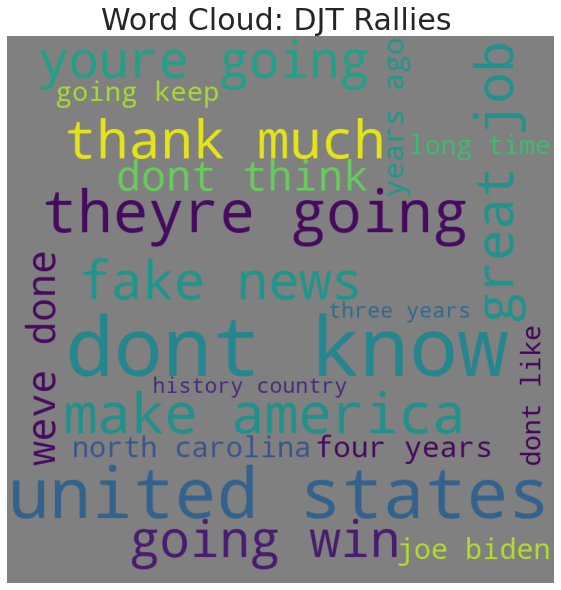

In [17]:
#get bi-grams from all speechs
bi_grams = list()
for speech in preprocessed_speechs:
    bi_grams = bi_grams + get_n_grams(speech, 2)

bi_grams_freq = nltk.FreqDist(bi_grams)
bi_grams_sorted = sorted(bi_grams_freq , key = bi_grams_freq.__getitem__, reverse = True)

# keep only 20
bi_grams_sorted = bi_grams_sorted[:20]
[print(item, ' : ', bi_grams_freq[item]) for item in bi_grams_sorted]

bi_grams_dict = dict()
for item in bi_grams_sorted:
    bi_grams_dict[' '.join(item)] = bi_grams_freq[item]
 
wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', min_font_size = 10).generate_from_frequencies(bi_grams_dict)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.rcParams.update({'font.size': 25})
plt.axis("off") 
plt.title('Word Cloud: DJT Rallies ')
plt.tight_layout(pad = 0) 
  
plt.show()

('make', 'america', 'great')  :  74
('four', 'years', 'ago')  :  43
('late', 'term', 'abortion')  :  43
('thank', 'much', 'thank')  :  41
('going', 'keep', 'winning')  :  40
('new', 'york', 'times')  :  38
('winning', 'winning', 'winning')  :  38
('president', 'united', 'states')  :  36
('keep', 'bear', 'arms')  :  35
('right', 'keep', 'bear')  :  34
('great', 'american', 'flag')  :  34
('love', 'country', 'honor')  :  33
('country', 'honor', 'history')  :  33
('help', 'devotion', 'drive')  :  33
('going', 'keep', 'working')  :  33
('keep', 'working', 'going')  :  33
('working', 'going', 'keep')  :  33
('going', 'keep', 'fighting')  :  33
('keep', 'winning', 'winning')  :  33
('sleepy', 'joe', 'biden')  :  32


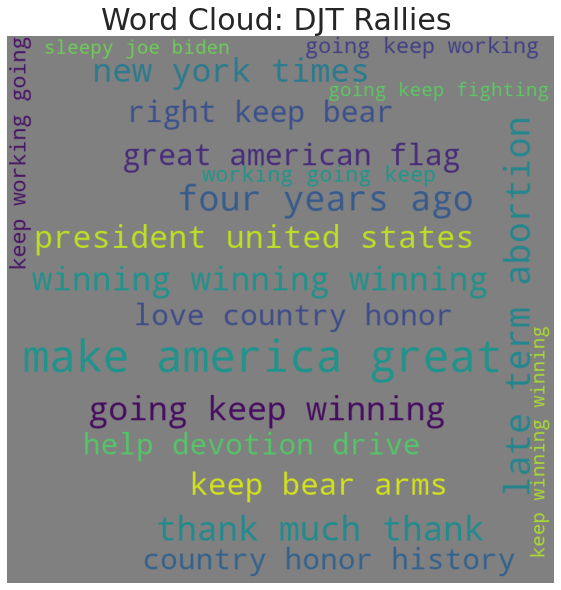

In [18]:
#get 3-grams from all speechs
three_grams = list()
for speech in preprocessed_speechs:
    three_grams = three_grams + get_n_grams(speech, 3)

three_grams_freq = nltk.FreqDist(three_grams)
three_grams_sorted = sorted(three_grams_freq , key = three_grams_freq.__getitem__, reverse = True)

# keep only 20
three_grams_sorted = three_grams_sorted[:20]
[print(item, ' : ', three_grams_freq[item]) for item in three_grams_sorted]

three_grams_dict = dict()
for item in three_grams_sorted:
    three_grams_dict[' '.join(item)] = three_grams_freq[item]
     
wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', min_font_size = 10).generate_from_frequencies(three_grams_dict)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.rcParams.update({'font.size': 25})
plt.axis("off") 
plt.title('Word Cloud: DJT Rallies ')
plt.tight_layout(pad = 0) 
  
plt.show()